# Tensorflow

## content
1. Tensorflow 1 workflow
2. Tensorflow 2 what's new
3. Model training in tensorflow 2.0
4. Usually used functions

## Tensorflow1 Workflow
![Tensorflow-work-flow](../images/Tensorflow-work-flow.png)  
Tensorflow is based on a **computation graph**, you first have to specify how the model will work through the computation graph, this part is just **DECLARATIVE**, you don't do any compuations here, you simply specify how the computations will be done.  

Then you need to specify the *hyper parameters* like learning rate, *loss function*, *optimizer*, ... etc, all of this affect the results.

Now we have a clear idea about how the computation will occur in the model and how the model should be trained we have to start a ***Session***, whatever work you want tensorflow to do, it has to be done within the scope of a session.

Remember that we said the computation graph is a declarative process, so in order to work with what we declared we have to actually initialize it, and allocate memory for it first.  

**Training the model**: this what we actually use tensorflow for, given the computation graph you provided tensorflow randomly initializes the weights, runs the graph, and then optimizes the weights.  

This is the overall view of how **Tensorflow** works.


# Tensorflow 2 What's new
This is all from the past, the past were to tensorflow was really hard to code and work with, so what have changed?

- **No more Sessions and welcome Eager execution**: rather than cutting the work flow into declarative part to define the graph and execution part within the session, now *tensorflow code is like any other code*, you write your code and execute it in the spot.
- **Keras is now more implemented inside tensorflow** and become more scalable: estimators were removed and now your work will scale on its own.
- **API clean up (strctured update)**: changes in function names, modules, most of v1.x stuff were moved under ***tf.compat.v1. ...*** you can use it from there, except the contrib part which was removed for good.
- **No more globals**: if you lose a variable it gets garbage collected.

you can find more by watching [this](https://www.youtube.com/watch?v=k5c-vg4rjBw) or reading [that](https://www.tensorflow.org/guide/effective_tf2)


### Examples on Tensorflow 2

In [1]:
# import numpy as np
import tensorflow as tf
# import matplotlib.pyplot as plt

In [2]:
a = tf.constant(4)
b = tf.constant(5)
c = a + b
print(c)

tf.Tensor(9, shape=(), dtype=int32)


## Model training in Tensorflow 2
it's very similar to the diagram above except with no sessions, you first define the model, *compile it*, train it, then run it. 

In [4]:
# first import the needed layers
from tensorflow.keras.layers import Dense

# Sequential model

First we need to create a sequential model, this is the most basic model in tensorflow, it's a linear stack of layers, you can think of it as a stack of layers, each layer is a function that takes the output of the previous layer as input and returns the output of the next layer.
Later we will see more complex models where we will use the tensorflow [functional API](https://www.tensorflow.org/guide/keras/functional).


In [8]:
# define the model
# this is the simplest model, consisiting of a single neuron, with single input and linear activation
model = tf.keras.Sequential([
  Dense(units=1, input_shape=[1])
])

# Model compilation

In this part we will see how to compile a model, this is the first step of training a model, we use it to specify *loss function*, *optimizer*, *metrics* and *optimizer* to the model, youn can check the [docs](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) for more.


In [9]:
# compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

In [5]:
# load the data
# let's learn some linear function y = 5 * x + 10
import numpy as np
x = np.arange(0, 10, 0.1)
y = 5 * x + 10

# Model training

In this part we will see how to train a model, we will use the [Keras API](https://www.tensorflow.org/guide/keras/overview) to train a model, we need to pass the data to train on, as well as some training parameters like `batch_size`, `epochs` ...etc, you can check the [docs](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) for more.

In [10]:
history = model.fit(x, y, epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 3ms/step - loss: 478.3211
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 20.2273
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 19.3224
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 18.9901
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 18.3042
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 17.5097
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 17.3142
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 15.8682
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 15.4212
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 14.5589
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 14.1197
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 13.7016
Epoch 13/100
4/4 [==============================

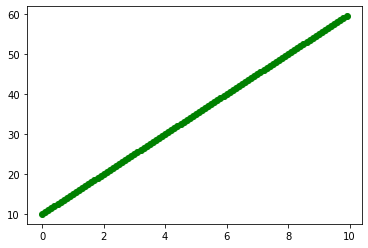

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x, y, 'go')

# Plotting the results

You can access the results of the training by using the `history` attribute of the model, it's a dictionary with all the training metrics, returned by the `fit` function after the model is trained, you can check the [docs](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) for more.


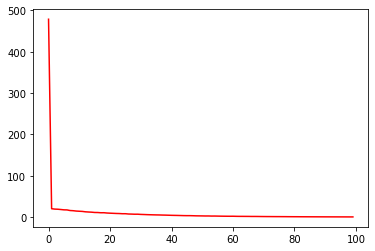

In [21]:
plt.plot(history.history['loss'], 'r-')